In [2]:
import pandas as pd

sql_records_df = pd.read_csv("pandas_df_preprocessed.csv")

In [3]:
# If there are duplicates we need to drop
sql_records_df.duplicated().sum()
sql_records_df[sql_records_df.duplicated()].drop_duplicates()

,full_url,parsed_url,event_time,hostname,sql_keyword,params_length,request_volume,special_chars,value_to_length


In [4]:
sql_records_df= sql_records_df.drop(["full_url", "parsed_url", "event_time", "hostname"], axis=1)

In [5]:
sql_records_df.describe()

,sql_keyword,params_length,request_volume,special_chars,value_to_length
count,3970.000000,3970.000000,3970.000000,3970.000000,3970.000000
mean,3.649622,83.505793,195.464786,1.343577,7.467188
std,1.713229,51.354357,34.679869,0.706904,3.969341
min,0.000000,2.000000,0.100000,0.000000,0.000000
25%,2.000000,47.000000,170.300000,1.000000,4.347826
50%,4.000000,66.000000,220.400000,1.000000,6.818182
75%,4.000000,116.000000,220.400000,2.000000,9.302326
max,9.000000,635.000000,220.400000,7.000000,23.076923


In [6]:
# If there is null we need to figure out something, lets hope this never happens
sql_records_df.isnull().sum()

sql_keyword        0
params_length      0
request_volume     0
special_chars      0
value_to_length    0
dtype: int64

In [7]:
columns_values = sql_records_df.columns.values.tolist()

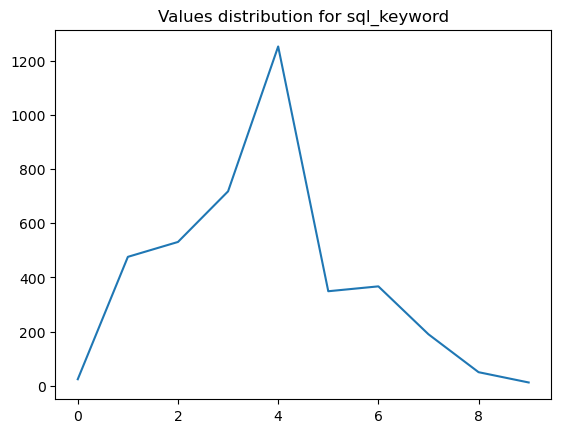

<Figure size 640x480 with 0 Axes>

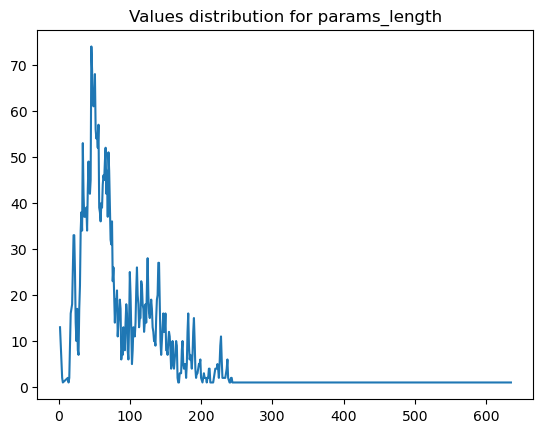

<Figure size 640x480 with 0 Axes>

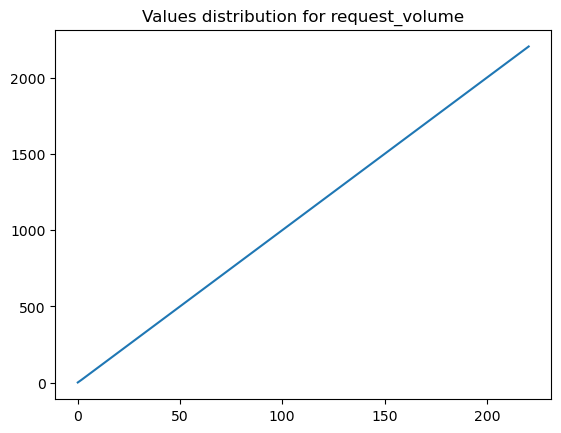

<Figure size 640x480 with 0 Axes>

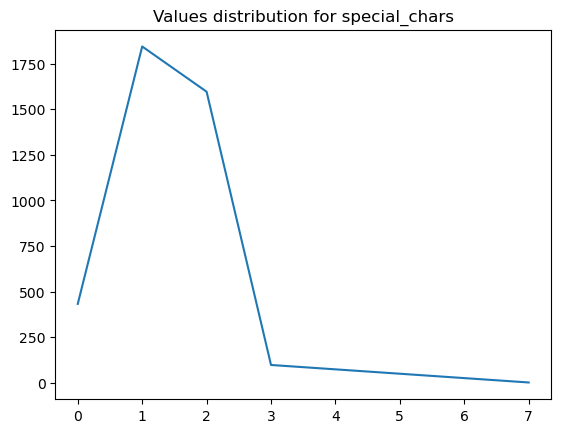

<Figure size 640x480 with 0 Axes>

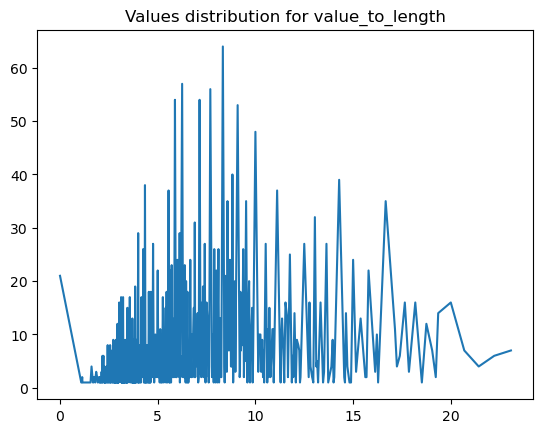

<Figure size 640x480 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

for col_name in columns_values:
    plt.figure()
    series_tmp = sql_records_df[col_name].value_counts().sort_index()
    plt.title(f'Values distribution for {col_name}')
    plt.plot(series_tmp.index, series_tmp.values)
    plt.show()
    plt.savefig(f'plots/values_distribution_{col_name}.png')

In [45]:
Q1 = sql_records_df.quantile(0.25)
Q3 = sql_records_df.quantile(0.75)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

outliers_LB = (sql_records_df[IQR.index] < LB).sum()
outliers_UB = (sql_records_df[IQR.index] > UB ).sum()

outliers = pd.DataFrame({'LB': LB, 'UB': UB, 'LB_outliers': outliers_LB, 'UB_outliers': outliers_UB}

In [46]:
outliers

,LB,UB,LB_outliers,UB_outliers
sql_keyword,-1.000000,7.000000,0,62
params_length,-56.500000,219.500000,0,92
request_volume,95.150000,295.550000,63,0
special_chars,-0.500000,3.500000,0,1
value_to_length,-3.083923,16.734075,0,132


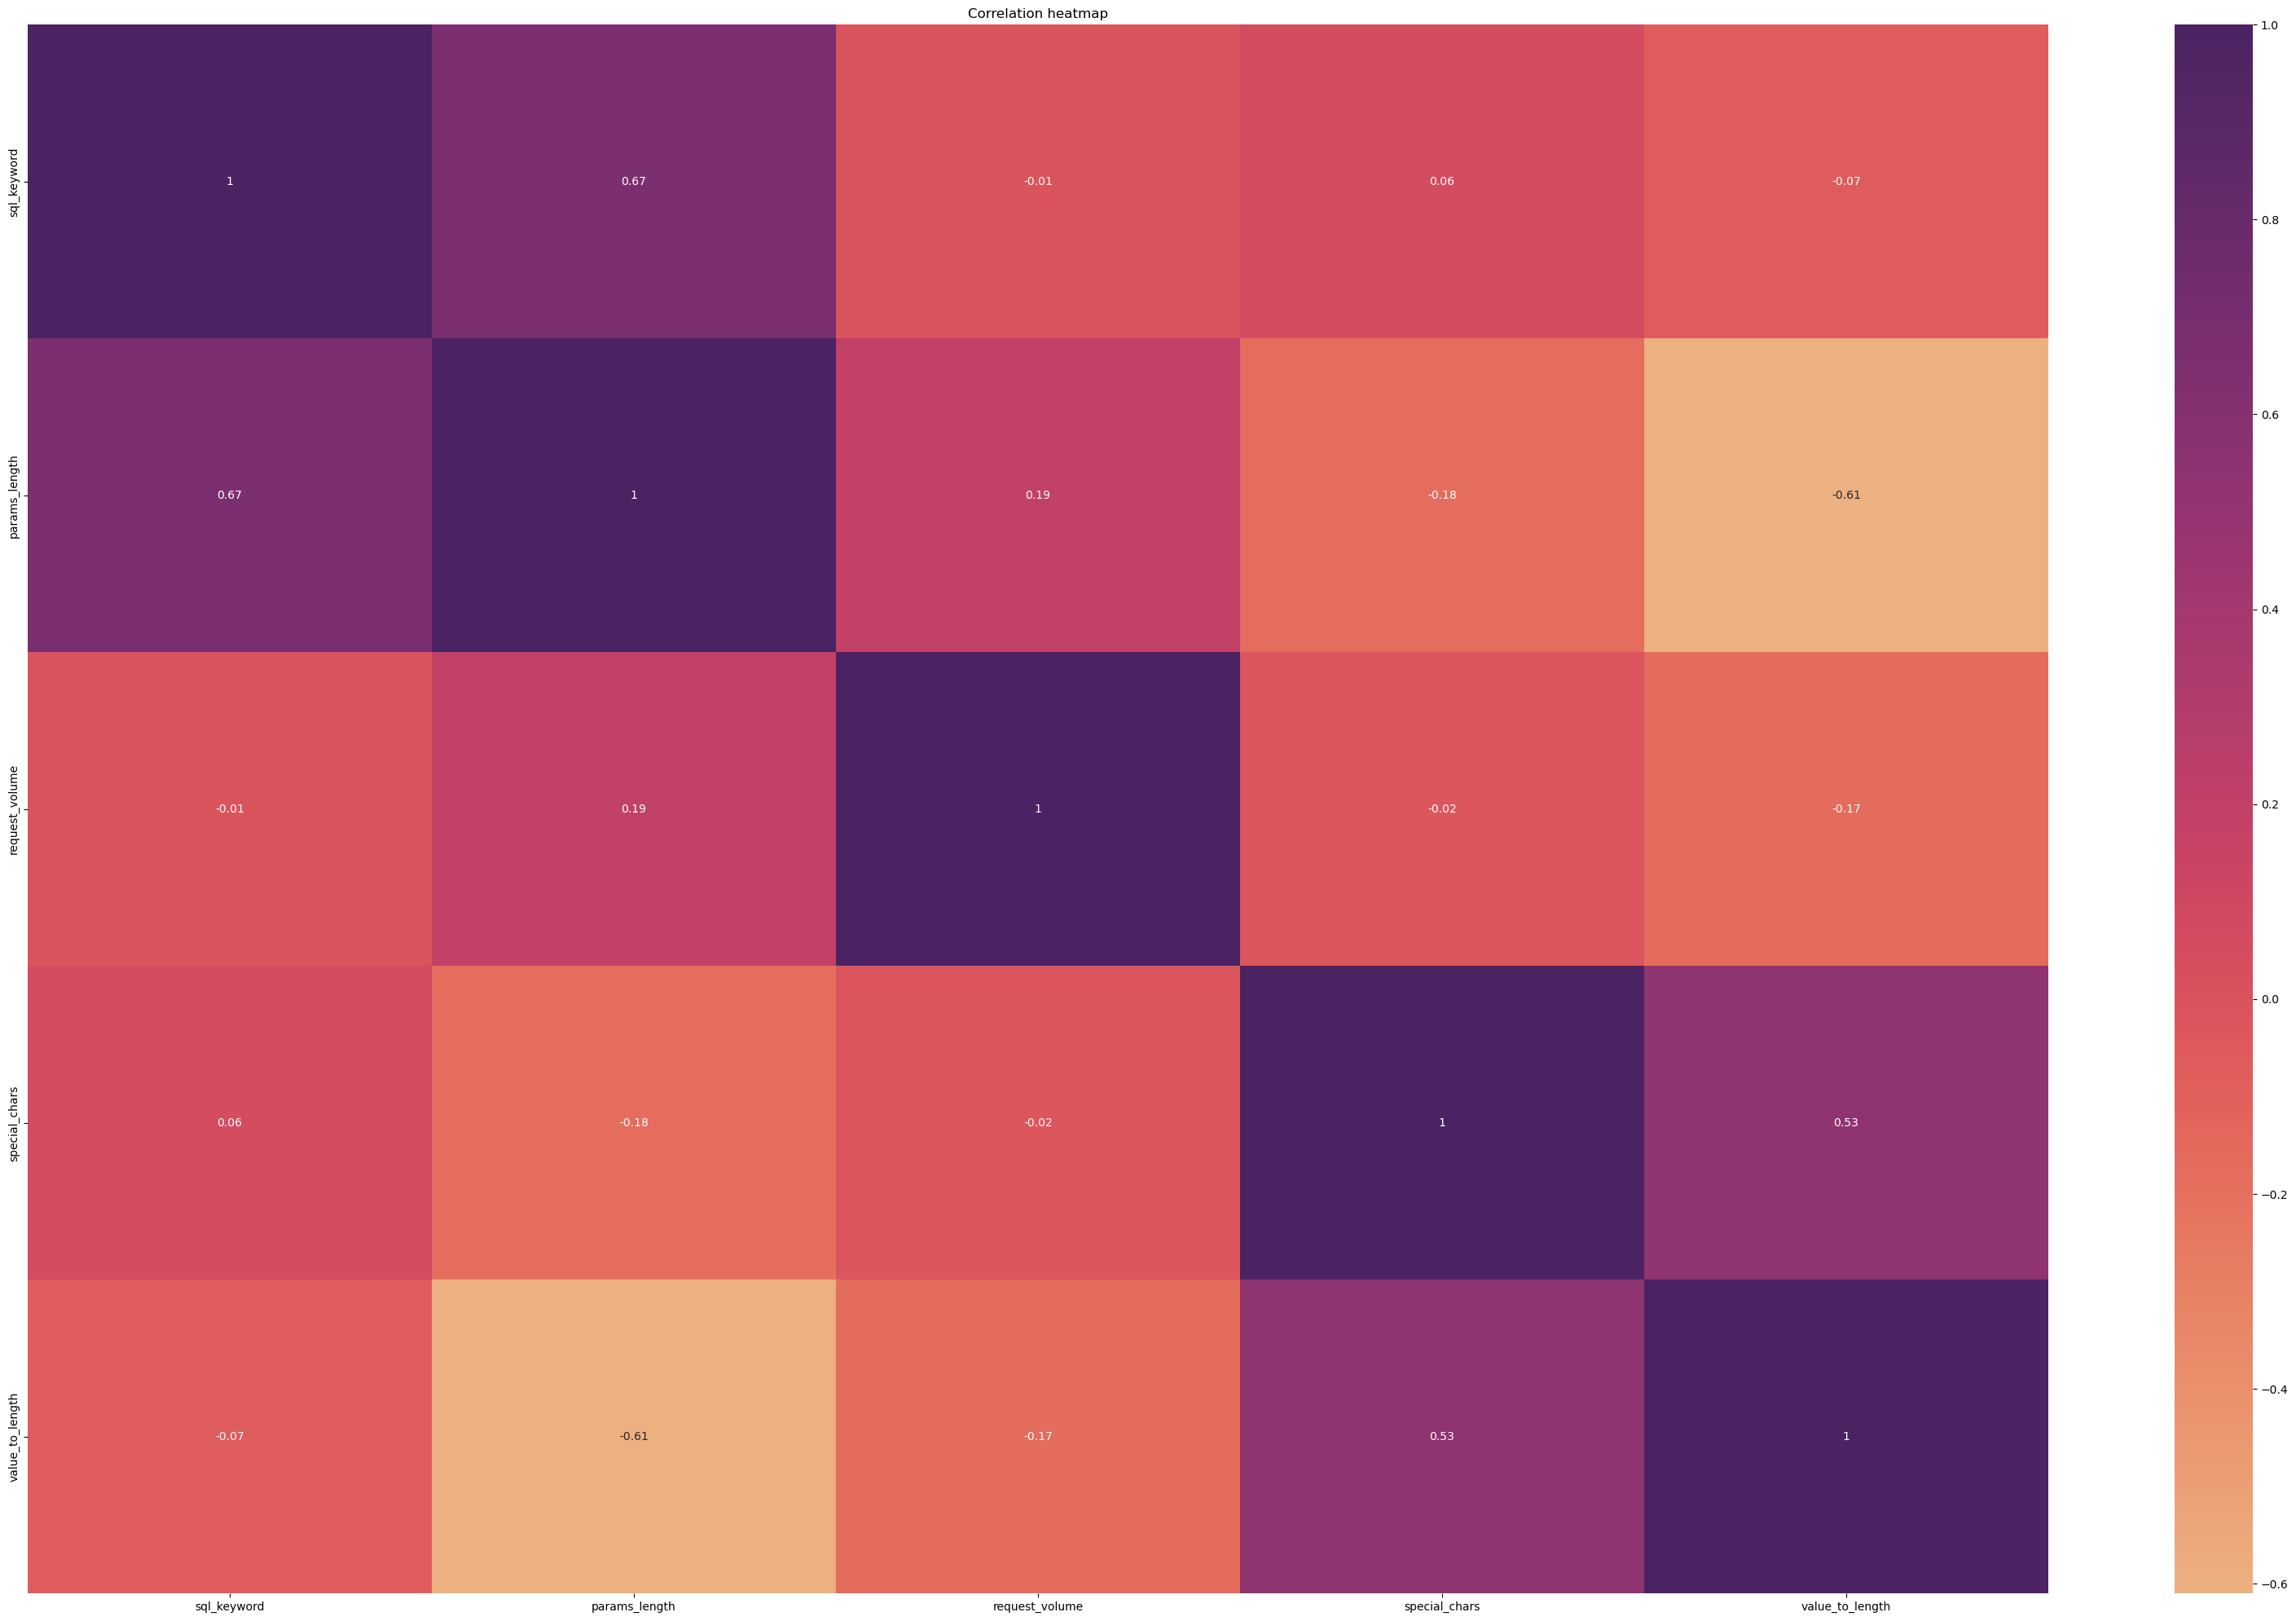

<Figure size 640x480 with 0 Axes>

In [52]:
corr_matrix = sql_records_df.corr(method = "pearson").round(2)
plt.figure(figsize=(40,25))
sns.heatmap(corr_matrix, annot = True, cmap = 'flare')
plt.title('Correlation heatmap')
plt.show()
plt.savefig(f'plots/correlation_heatmap.png')
